In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [3]:
daily = pd.read_csv('files/seattle_bike.csv', index_col='Date')

In [4]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [17]:
x_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']

X = daily[x_names]


y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [18]:
len(daily)

1064

In [19]:
daily['predicted'] = model.predict(X)


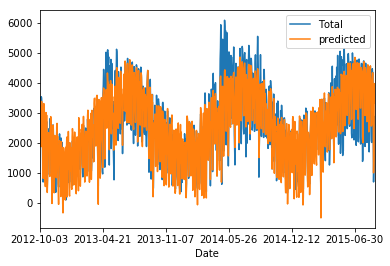

In [20]:
daily[['Total', 'predicted']].plot();

In [23]:
params = pd.DataFrame(model.coef_,index=x_names)
params

,0
Mon,504.882756
Tue,610.233936
Wed,592.673642
Thu,482.358115
Fri,177.980345
Sat,-1103.301710
Sun,-1133.567246
holiday,-1187.401381
daylight_hrs,128.851511
PRCP,-664.834882


In [24]:
daily['Temp (C) sq'] = daily['Temp (C)'] * daily['Temp (C)']

daily[['Temp (C)', 'Temp (C) sq']].describe()

,Temp (C),Temp (C) sq
count,1064.000000,1064.000000
mean,12.567528,195.047892
std,6.094262,161.402643
min,-3.800000,0.000000
25%,8.050000,64.802500
50%,11.675000,136.306250
75%,17.750000,315.062500
max,26.700000,712.890000


In [26]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 
                'holiday', 'daylight_hrs', 'PRCP', 'dry day', 
                'Temp (C)', 'Temp (C) sq', 'annual']

X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted 2'] = model.predict(X)

In [27]:
params = pd.DataFrame(model.coef_, 
                      index=X.columns)
params

,0
Mon,324.851616
Tue,428.989662
Wed,411.249661
Thu,301.291577
Fri,-5.455089
Sat,-1282.868439
Sun,-1310.674133
holiday,-1181.820043
daylight_hrs,124.164474
PRCP,-683.955973


In [28]:
daily[['Total','predicted','predicted 2']].corr()

,Total,predicted,predicted 2
Total,1.000000,0.931416,0.932850
predicted,0.931416,1.000000,0.998463
predicted 2,0.932850,0.998463,1.000000


In [29]:
.93 * .93

0.8649000000000001